In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# Extra Credit

> If you know how to estimate simple regressions, this one's for you! On *bcourses* you'll find two files, `happydata.txt` and `codebook.txt`. The former contains variables called `HAPPY`, `REALINC`, and `REGION`.  Download these.

---

# Part 1

First let's read in the data:

In [2]:
happy_data = pd.read_csv("data/happydata.csv")
happy_data.head()

,CASEID,YEAR,REGION,HAPPY,REALINC
0,1,1972,3,3,18951
1,2,1972,3,3,24366
2,3,1972,3,2,24366
3,4,1972,3,3,30458
4,5,1972,3,2,50763


We can get some quick summary statistics:

In [3]:
happy_data.describe()

,CASEID,YEAR,REGION,HAPPY,REALINC
count,55087.000000,55087.000000,55087.000000,55087.000000,55087.000000
mean,27544.000000,1991.370596,4.885508,1.708969,28183.557082
std,15902.391476,11.299333,2.449271,0.969792,28644.955126
min,1.000000,1972.000000,1.000000,0.000000,0.000000
25%,13772.500000,1982.000000,3.000000,1.000000,8595.000000
50%,27544.000000,1991.000000,5.000000,2.000000,21068.000000
75%,41315.500000,2002.000000,7.000000,2.000000,36575.000000
max,55087.000000,2010.000000,9.000000,9.000000,162607.000000


As per directions, we'll drop responses for `HAPPY` that should not factor into our analysis:

In [4]:
happy_data = happy_data[happy_data["HAPPY"] != 8] # Don't know
happy_data = happy_data[happy_data["HAPPY"] != 9] # No answer
happy_data = happy_data[happy_data["HAPPY"] != 0] # Not applicable
happy_data.describe()

,CASEID,YEAR,REGION,HAPPY,REALINC
count,50357.000000,50357.000000,50357.000000,50357.000000,50357.000000
mean,25998.103759,1990.276545,4.871398,1.807872,27945.333141
std,15634.690306,11.121952,2.449543,0.635553,27977.467779
min,1.000000,1972.000000,1.000000,1.000000,0.000000
25%,12635.000000,1982.000000,3.000000,1.000000,8636.000000
50%,25377.000000,1990.000000,5.000000,2.000000,21068.000000
75%,38050.000000,1998.000000,7.000000,2.000000,36189.000000
max,55087.000000,2010.000000,9.000000,3.000000,162607.000000


## Visualizing the Data

Before we perform our regressions, let's first do some exploratory data analysis to see what we're working with:

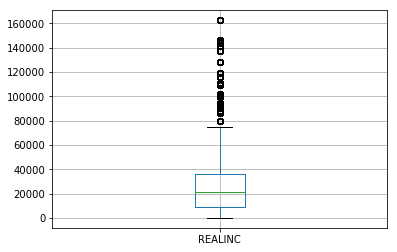

In [5]:
happy_data.boxplot("REALINC")
plt.show()

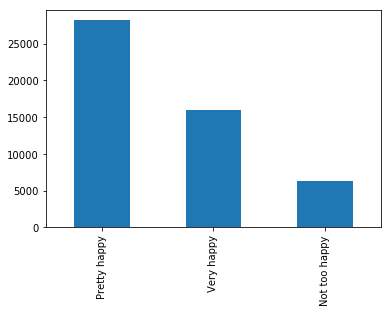

In [6]:
happy = {1: "Very happy",
         2: "Pretty happy",
         3: "Not too happy"}

happy_data["HAPPY"].map(happy).value_counts().plot(kind='bar')
plt.show()

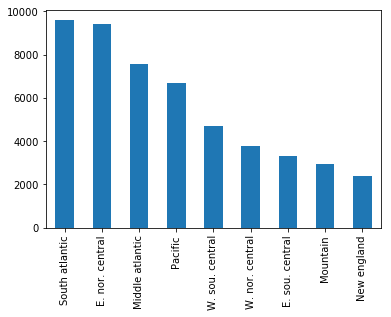

In [7]:
regions = {1: "New england",
           2: "Middle atlantic",
           3: "E. nor. central",
           4: "W. nor. central",
           5: "South atlantic",
           6: "E. sou. central",
           7: "W. sou. central",
           8: "Mountain",
           9: "Pacific"}

happy_data["REGION"].map(regions).value_counts().plot(kind='bar')
plt.show()

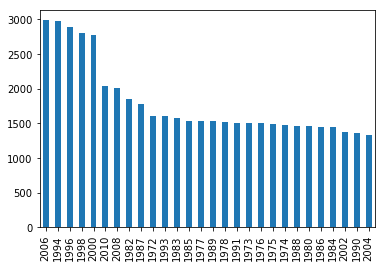

In [8]:
happy_data["YEAR"].value_counts().plot(kind='bar')
plt.show()

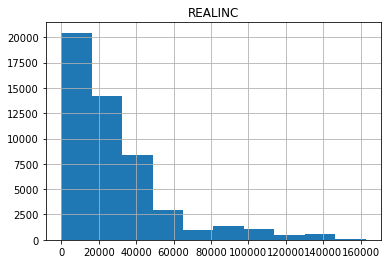

In [9]:
happy_data.hist("REALINC")
plt.show()

Looks like there might be a lot of reported 0 incomes:

In [10]:
happy_data["REALINC"].value_counts()[0] / len(happy_data["REALINC"])

0.099072621482614129

Nearly 10% of the reported `REALINC` are 0.

Let's make some scatter plots:

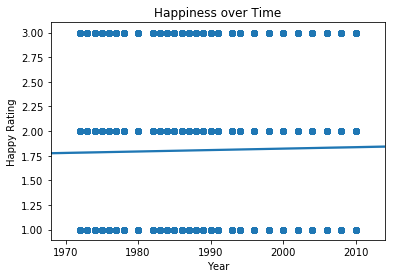

In [11]:
sns.regplot(happy_data["YEAR"], happy_data["HAPPY"])
plt.title("Happiness over Time")
plt.xlabel("Year")
plt.ylabel("Happy Rating")
plt.show()

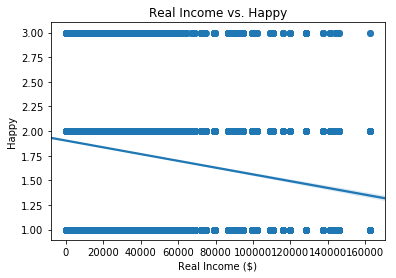

In [12]:
sns.regplot(happy_data["REALINC"], happy_data["HAPPY"])
plt.title("Real Income vs. Happy")
plt.xlabel("Real Income ($)")
plt.ylabel("Happy")
plt.show()

While it is always good to get a sense of how the data is distributed visually, we cannot gain much insight right away, until we perform the regressions. 

# Part 2

> Estimate the mean values of `HAPPY` and `REALINC` by region.  Discuss. (Note: you will want to ignore any values for these variables which indicate different missing codes; see the codebook).

In [13]:
happy_reg_mean = []
inc_reg_mean = []
regions_mean = []

for i in range(min(happy_data['REGION']), max(happy_data['REGION'] + 1)):
    print(regions[i])
    means = happy_data[happy_data['REGION'] == i][['HAPPY', 'REALINC']].mean()
    print("Mean HAPPY: " + str(means[0]))
    print("Mean REALINC: " + str(means[1]))
    print()
    happy_reg_mean.append(means[0])
    inc_reg_mean.append(means[1])
    regions_mean.append(regions[i])

New england
Mean HAPPY: 1.77445193929
Mean REALINC: 34595.9709106

Middle atlantic
Mean HAPPY: 1.85581887992
Mean REALINC: 29592.7595657

E. nor. central
Mean HAPPY: 1.81490129484
Mean REALINC: 28273.9355763

W. nor. central
Mean HAPPY: 1.76955602537
Mean REALINC: 26380.9030127

South atlantic
Mean HAPPY: 1.79412993524
Mean REALINC: 26295.3324629

E. sou. central
Mean HAPPY: 1.775
Mean REALINC: 21203.7746988

W. sou. central
Mean HAPPY: 1.80621805792
Mean REALINC: 24825.0858177

Mountain
Mean HAPPY: 1.79675346635
Mean REALINC: 27904.9259385

Pacific
Mean HAPPY: 1.81943404701
Mean REALINC: 32071.1952388



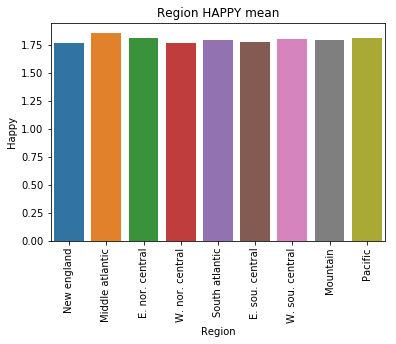

In [14]:
g = sns.barplot(x=regions_mean, y=happy_reg_mean)
g.set_xticklabels(labels=regions_mean, rotation=90)
plt.title("Region HAPPY mean")
plt.xlabel("Region")
plt.ylabel("Happy")
plt.show()

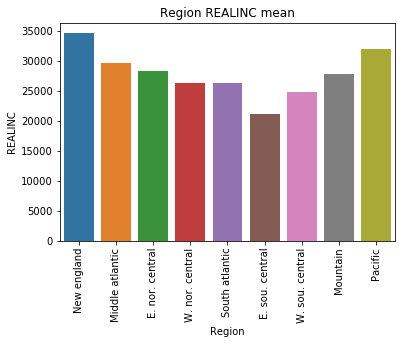

In [15]:
g = sns.barplot(x=regions_mean, y=inc_reg_mean)
g.set_xticklabels(labels=regions_mean, rotation=90)
plt.title("Region REALINC mean")
plt.xlabel("Region")
plt.ylabel("REALINC")
plt.show()
plt.show()

# Part 3

> Consider a simple regression of the form 

> $\mbox{VHAPPY}_i= \alpha + \beta\log(\mbox{REALINC}) + \epsilon_i$


> where the subscripts $i$ indicate the value of the variable for the $i$th observation, and $\mbox{VHAPPY}_i$ takes the value 1 if the respondent is "Very happy", and zero otherwise. Estimate the regression.  How would you interpret your estimates of the coefficients?

Before we estimate the regression we will change the remaining `HAPPY` values that aren't "very happy" to 0:

In [16]:
happy_data.loc[happy_data["HAPPY"] > 1, 'HAPPY'] = 0
happy_data.describe()

,CASEID,YEAR,REGION,HAPPY,REALINC
count,50357.000000,50357.000000,50357.000000,50357.000000,50357.000000
mean,25998.103759,1990.276545,4.871398,0.316480,27945.333141
std,15634.690306,11.121952,2.449543,0.465107,27977.467779
min,1.000000,1972.000000,1.000000,0.000000,0.000000
25%,12635.000000,1982.000000,3.000000,0.000000,8636.000000
50%,25377.000000,1990.000000,5.000000,0.000000,21068.000000
75%,38050.000000,1998.000000,7.000000,1.000000,36189.000000
max,55087.000000,2010.000000,9.000000,1.000000,162607.000000


We can also get the counts for `HAPPY` being 0 or 1:

In [17]:
happy_data["HAPPY"].value_counts()

0    34420
1    15937
Name: HAPPY, dtype: int64

Now we can estimate:

$\mbox{VHAPPY}_i= \alpha + \beta\log(\mbox{REALINC}) + \epsilon_i$

In [18]:
mod = smf.ols(formula='HAPPY ~ np.log(REALINC + .0001)', data=happy_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  HAPPY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.877
Date:                Sun, 24 Sep 2017   Prob (F-statistic):             0.0490
Time:                        10:20:32   Log-Likelihood:                -32903.
No. Observations:               50357   AIC:                         6.581e+04
Df Residuals:                   50355   BIC:                         6.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In our basic regression, we have some significance (p-value of .049) of a positive influence of `REALINC` on `HAPPY`, although our R-squared is 0.

Let's add in the `REGION` dummies:

In [19]:
happy_data["REGION"] = happy_data["REGION"].map(regions)  # map regions
mod = smf.ols(formula='HAPPY ~ np.log(REALINC + .0001) + C(REGION)', data=happy_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  HAPPY   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.408
Date:                Sun, 24 Sep 2017   Prob (F-statistic):           6.94e-11
Time:                        10:20:32   Log-Likelihood:                -32872.
No. Observations:               50357   AIC:                         6.576e+04
Df Residuals:                   50347   BIC:                         6.585e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Here we see that certain regional dummy variable are significant in different directions. The coefficient for the Middle atlantic is negative, while the coefficient for the South Atlantic is positive, both with high significance. Our R-squared is still very low.